Preprocessing the dataset

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import pandas as pd 

df = pd.read_csv('/gdrive/My Drive/BTP/Dataset/data/English/covid19_infodemic_english_data.tsv', sep='\t')


In [3]:
df.head()

,tweet_id,text,q1_label,q2_label,q3_label,q4_label,q5_label,q6_label,q7_label
0,1241025578527903750,For the average American the best way to tell ...,no,NaN,NaN,NaN,NaN,no_joke_or_sarcasm,no_not_interesting
1,1240467080954228737,this is fucking bullshit,no,NaN,NaN,NaN,NaN,no_not_harmful,no_not_interesting
2,1240716889162018816,Can y’all please just follow the government’s ...,no,NaN,NaN,NaN,NaN,no_not_harmful,no_not_interesting
3,1241062514886090754,No offense but the corona virus disappearing b...,no,NaN,NaN,NaN,NaN,no_not_harmful,no_not_interesting
4,1241447017945223169,This is the face of someone who just spent 9 h...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,1_no_definitely_not_harmful,yes_not_urgent,no_not_harmful,no_not_interesting


In [4]:
df = df.drop(['q2_label', 'q3_label', 'q4_label', 'q5_label', 'q6_label', 'q7_label'], axis=1)
df = df.rename(columns={'q1_label': 'Has_Verifiable_Claim'})
df

,tweet_id,text,Has_Verifiable_Claim
0,1241025578527903750,For the average American the best way to tell ...,no
1,1240467080954228737,this is fucking bullshit,no
2,1240716889162018816,Can y’all please just follow the government’s ...,no
3,1241062514886090754,No offense but the corona virus disappearing b...,no
4,1241447017945223169,This is the face of someone who just spent 9 h...,yes
...,...,...,...
499,1235967176475111432,President Trump's comments about the coronavir...,yes
500,1236056191324864515,Drug companies reportedly killed a provision i...,yes
501,1235987075440283648,Does @twitter have a team fighting covid-19 ru...,no
502,1235959558058754048,#FOX to cause PANDEMIC #FoxNews is spreading ...,yes


In [ ]:
pip install googletrans

In [ ]:
from googletrans import Translator
translator = Translator()

df_hindi = df.copy()
df_hindi['text'] = df_hindi['text'].apply(lambda text : translator.translate(text, dest='hi').text)

In [ ]:
df_hindi


,tweet_id,text,Has_Verifiable_Claim
0,1241025578527903750,औसत अमेरिकी के लिए यह बताने का सबसे अच्छा तरीक...,no
1,1240467080954228737,यह बकवास है,no
2,1240716889162018816,क्या आप कृपया सरकार के निर्देशों का पालन कर सक...,no
3,1241062514886090754,कोई अपराध नहीं है लेकिन अप्रैल से पहले गायब हो...,no
4,1241447017945223169,यह किसी ऐसे व्यक्ति का चेहरा है जिसने लंदन के ...,yes
...,...,...,...
499,1235967176475111432,कोरोनोवायरस मृत्यु दर के बारे में राष्ट्रपति ट...,yes
500,1236056191324864515,दवा कंपनियों ने कथित तौर पर कोरोना वायरस फंडिं...,yes
501,1235987075440283648,क्या @ वेटर के पास प्लेटफॉर्म @jack पर कोविद -...,no
502,1235959558058754048,#FOX कारण PANDEMIC #FoxNews फैल रहा है # ट्रम्...,yes


In [ ]:
idx_drop_hi = [index for index, row in df_hindi.iterrows() if translator.detect(row['text']).lang == 'en']

df_hindi_mod = df_hindi.copy()
df_hindi_mod = df_hindi_mod.drop(idx_drop_hi)
print(len(df_hindi_mod))

242


In [ ]:
def preprocess(df_lang):
    
    import re
    tweets = {}
    tweets['text_info'] = {}

    #extract text
    tweets['text'] = df_lang['text']
    
    #extract labels
    tweets['labels'] = df_lang['Has_Verifiable_Claim'].apply(lambda label : 1 if label == 'yes' else 0)
    
    #text features
    tweets['text_info']['len'] =  tweets['text'].apply(lambda x: len(x))
    tweets['text_info']['num_of_upper_char'] = tweets['text'].apply(lambda text: sum([len([char for char in word if char.isupper()]) for word in text]))
    tweets['text_info']['has_qmarks'] = tweets['text'].apply(lambda text: True if '?' in text else False) 
    tweets['text_info']['num_of_qmarks'] = tweets['text'].apply(lambda text: sum([len([char for char in word if char == '?']) for word in text])) 
    tweets['text_info']['has_exclmmarks'] = tweets['text'].apply(lambda text: True if '!' in text else False)
    tweets['text_info']['num_of_exclmmarks'] = tweets['text'].apply(lambda text: sum([len([char for char in word if char == '!']) for word in text]))
                                                
    #lowercase all words
    tweets['text'] = tweets['text'].apply(lambda x: x.lower())

    #remove urls
    url = r'http\S+'
    tweets['text'] = tweets['text'].apply(lambda x: re.sub(url, 'URL', x, flags=re.MULTILINE))

    #remove emojis
    emoji = re.compile("["         u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002500-\U00002BEF"  # chinese char
                                   u"\U00002702-\U000027B0"
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   u"\U0001f926-\U0001f937"
                                   u"\U00010000-\U0010ffff"
                                   u"\u2640-\u2642"
                                   u"\u2600-\u2B55"
                                   u"\u200d"
                                   u"\u23cf"
                                   u"\u23e9"
                                   u"\u231a"
                                   u"\ufe0f"  # dingbats
                                   u"\u3030"
                                   "]+", flags=re.UNICODE)
    tweets['text'] = tweets['text'].apply(lambda x: emoji.sub(r'', x))

    tweets['text'] = tweets['text'].apply(lambda x:[word[1:] if word[0] == '#' else word for word in x.split()])
    
    #rejoin to form a sentence
    tweets['text'] = tweets['text'].apply(lambda x: ' '.join(x))
    
    
    return tweets

In [ ]:
#preprocessing English tweets
tweets = preprocess(df)
#length of tweets
print(len(tweets['text']))
print('-------------------------------------------')
#original text
print('Original message : ', df.iloc[502]['text'] )
print('-------------------------------------------')
#preprocessed text
print('Preprocessed message : ', tweets['text'][502])
print('-------------------------------------------')
#preprocessed text
print('Message has verifiable claim : ', tweets['labels'][502])

504
-------------------------------------------
Original message :  #FOX to cause PANDEMIC  #FoxNews is spreading #Trump's #CORONAVIRUS LIES faster than the disease itself  Steer clear of MAGA hats: They're being told the whole thing is a HOAX, and their leader's got it under control, go to work  #MOG☘️ #Christians #MAGA https://t.co/RmrDtoL4bE
-------------------------------------------
Preprocessed message :  fox to cause pandemic foxnews is spreading trump's coronavirus lies faster than the disease itself steer clear of maga hats: they're being told the whole thing is a hoax, and their leader's got it under control, go to work mog christians maga URL
-------------------------------------------
Message has verifiable claim :  1


In [ ]:
#checking extracted sentential features of tweets
print('Tweet Info Length ..', tweets['text_info']['len'])
print('-------------------------------------------------')
print('Tweet # upper case chars ..', tweets['text_info']['num_of_upper_char'])
print('-------------------------------------------------')
print('Tweet has ? ..', tweets['text_info']['has_qmarks'])
print('-------------------------------------------------')
print('Tweet # ? ..', tweets['text_info']['num_of_qmarks'])
print('-------------------------------------------------')
print('Tweet has ! ..', tweets['text_info']['has_exclmmarks'])
print('-------------------------------------------------')
print('Tweet # ! ..', tweets['text_info']['num_of_exclmmarks'])

Tweet Info Length .. 0      134
1       24
2      218
3       72
4      292
      ... 
499    247
500    275
501    273
502    278
503    237
Name: text, Length: 504, dtype: int64
-------------------------------------------------
Tweet # upper case chars .. 0       2
1       0
2       7
3       2
4       7
       ..
499     5
500     5
501     3
502    51
503    30
Name: text, Length: 504, dtype: int64
-------------------------------------------------
Tweet has ? .. 0      False
1      False
2       True
3      False
4      False
       ...  
499    False
500    False
501    False
502    False
503    False
Name: text, Length: 504, dtype: bool
-------------------------------------------------
Tweet # ? .. 0      0
1      0
2      1
3      0
4      0
      ..
499    0
500    0
501    0
502    0
503    0
Name: text, Length: 504, dtype: int64
-------------------------------------------------
Tweet has ! .. 0      False
1      False
2       True
3      False
4      False
       ...  
499   

In [ ]:
df_hindi_mod

,tweet_id,text,Has_Verifiable_Claim
73,1240729932948439045,Bro idk क्या चल रहा है लेकिन मैं उनसे सहमत हूं...,no
74,1242493913337913345,हमारे चिकित्सा पेशेवर हमारे देश को बनाए रखने क...,no
75,1241720506153201665,"प्रिय अल्लाह, कृपया हर कीमत पर गाजा की रक्षा करें",no
76,1241512518721376257,"स्लोवाकिया के राष्ट्रपति ने अपने कोरोना ड्रिप,...",yes
83,1240906846933790720,जर्मनी सप्ताह में 160k कोविद -19 परीक्षण कर रह...,yes
...,...,...,...
499,1235967176475111432,कोरोनोवायरस मृत्यु दर के बारे में राष्ट्रपति ट...,yes
500,1236056191324864515,दवा कंपनियों ने कथित तौर पर कोरोना वायरस फंडिं...,yes
501,1235987075440283648,क्या @ वेटर के पास प्लेटफॉर्म @jack पर कोविद -...,no
502,1235959558058754048,#FOX कारण PANDEMIC #FoxNews फैल रहा है # ट्रम्...,yes


In [ ]:
#preprocessing Hindi Tweets
tweets_hi = preprocess(df_hindi_mod)
#length of tweets_hi
print(len(tweets_hi['text']))
print('-------------------------------------------')
#original text
print('Original message : ', df_hindi_mod.iloc[241]['text'] )
print('-------------------------------------------')
#preprocessed text
print('Preprocessed message : ', tweets_hi['text'][437])
print('-------------------------------------------')
#preprocessed text
print('Message has verifiable claim : ', tweets_hi['labels'][437])

242
-------------------------------------------
Original message :  NURTW लागोस पहले से ही # COVID19 पर अपने लोगों को संवेदनशील बना रहा है, हाथ सेनिटाइज़र आदि साझा कर रहा है ...... जबकि कुछ बहुत "शिक्षित" लोग फेक न्यूज़ फैला रहे हैं और रोगी पर संदेह कर रहे हैं। NURTW 1 - डिमांड डे 0 # Covid19Lagos https://t.co/QcJuHt6pA3
-------------------------------------------
Preprocessed message :  कोरोना oppa कृपया बंद करो आप विश्व भ्रमण कर रहे हैं यू सरंगहा को आराम देने की जरूरत है
-------------------------------------------
Message has verifiable claim :  0


In [ ]:
#saving tweet info
import pickle as pkl
with open('/gdrive/My Drive/BTP/Dataset/Pickel/covid_en_tweet.pickle', 'wb') as pkl_out:
    pkl.dump(tweets, pkl_out)
with open('/gdrive/My Drive/BTP/Dataset/Pickel/covid_hi_tweet.pickle', 'wb') as pkl_out:
    pkl.dump(tweets_hi, pkl_out)

Yes :  305 No :  199


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


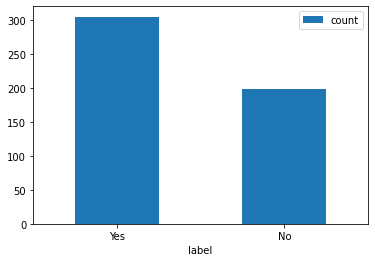

In [ ]:
#english dataset stats
import seaborn as sns
import matplotlib.pyplot
lst = df['Has_Verifiable_Claim'].to_list()
print('Yes : ', lst.count('yes'), 'No : ', lst.count('no') )
df_plot = pd.DataFrame({'label':['Yes', 'No'], 'count':[lst.count('yes'), lst.count('no')]})
df_plot.plot.bar(x='label', y='count', rot=0)

Yes :  153 No :  89


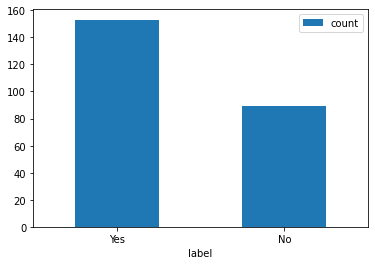

In [ ]:
#hindi dataset stats
lst = df_hindi_mod['Has_Verifiable_Claim'].to_list()
print('Yes : ', lst.count('yes'), 'No : ', lst.count('no') )
df_plot = pd.DataFrame({'label':['Yes', 'No'], 'count':[lst.count('yes'), lst.count('no')]})
df_plot.plot.bar(x='label', y='count', rot=0)